In [55]:
import keras
keras.__version__

'2.2.4'

In [56]:
# mount your Drive

from google.colab import drive, files
drive.mount('/content/drive/') 
url = "https://drive.google.com/uc?export=download&id=1PEwQhlQD-8AW5ghsghZea3_QbDgD46fN" #jenna csv


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Index(['Total Outages', 'Temp', 'Preci', 'Gust', 'Wind', 'WindDir'], dtype='object')
[[  0.          2.5400023   0.          6.96        2.69      278.7      ]
 [  0.          2.0499816   0.          4.98        1.75      293.80002  ]
 [  0.          2.1799865   0.          5.69        1.9       283.30002  ]
 ...
 [  0.         -7.179999    0.          6.5099998   3.1599998 310.1      ]
 [  0.         -7.7000184   0.          7.16        3.07      306.1      ]
 [  0.        -10.700018    0.          3.27        2.72      301.       ]]


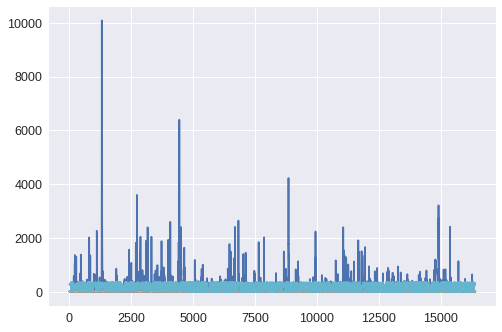

In [57]:
##read input data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense


df = pd.read_csv(url, engine = 'python')

df = df.drop(['TimeStamp'], axis=1)
print(df.columns)
dataset = df.values
dataset = dataset.astype('float32')

float_data =dataset
print(float_data)
#data = dataset[1,]
#lines = data.split(;\n)
plt.plot(dataset)
plt.show()

#Question 1 -EDA

In [58]:
df.head()

,Total Outages,Temp,Preci,Gust,Wind,WindDir
0,0,2.540002,0.0,6.96,2.69,278.700012
1,0,2.049982,0.0,4.98,1.75,293.800018
2,0,2.179987,0.0,5.69,1.90,283.300018
3,0,2.299982,0.0,7.15,1.74,278.600006
4,0,2.519983,0.0,7.42,2.77,293.200012


In [59]:
df.columns

Index(['Total Outages', 'Temp', 'Preci', 'Gust', 'Wind', 'WindDir'], dtype='object')

In [60]:
df.shape

(16396, 6)

In [61]:
#Checking for missing values
total = df.isnull().sum().sort_values(ascending=False) #finding count of null values
percent_1 = df.isnull().sum()/df.isnull().count()*100 #finding percent of null values
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) #sort percent of missing values
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) 
missing_data

,Total,%
WindDir,0,0.0
Wind,0,0.0
Gust,0,0.0
Preci,0,0.0
Temp,0,0.0
Total Outages,0,0.0


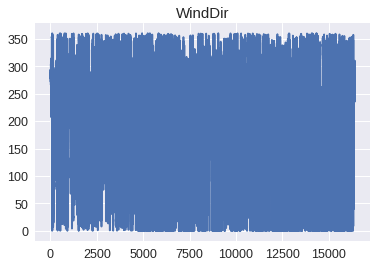

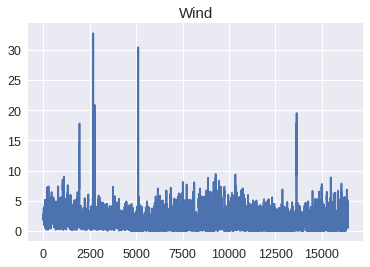

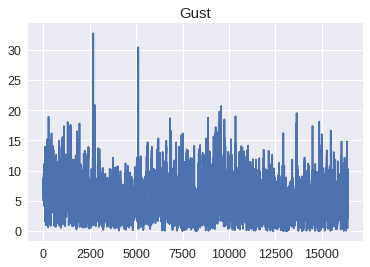

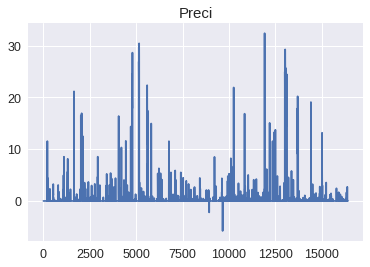

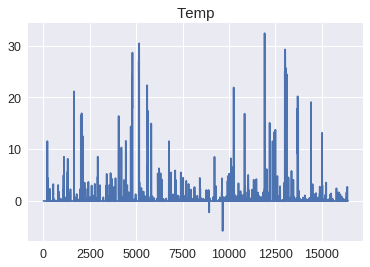

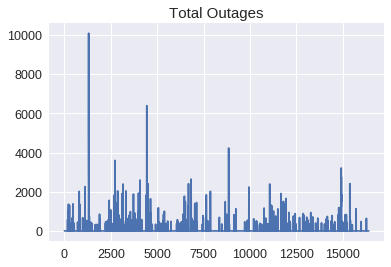

In [62]:
#Histograms of numerical variables
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(df['WindDir'])), df['WindDir'])
plt.title('WindDir')
plt.show()

plt.plot(range(len(df['Wind'])), df['Wind'])
plt.title('Wind')
plt.show()

plt.plot(range(len(df['Gust'])), df['Gust'])
plt.title('Gust')
plt.show()

plt.plot(range(len(df['Preci'])), df['Preci'])
plt.title('Preci')
plt.show()


plt.plot(range(len(df['Temp'])), df['Temp'])
plt.title('Temp')
plt.show()

plt.plot(range(len(df['Total Outages'])), df['Total Outages'])
plt.title('Total Outages')
plt.show()


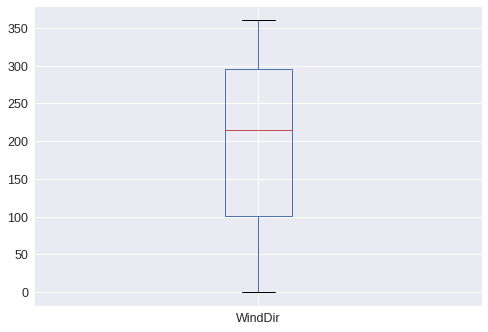

In [104]:
#Boxplot
#df = pd.read_csv(url, engine = 'python')
df.boxplot(column=['WindDir' ])


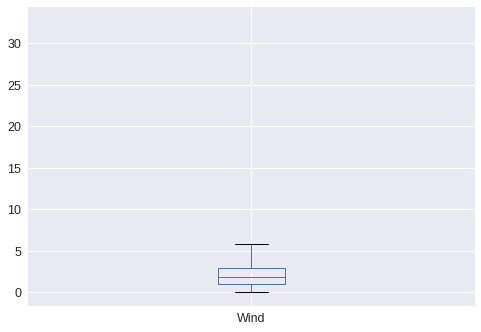

In [105]:

df.boxplot(column=[  'Wind' ])


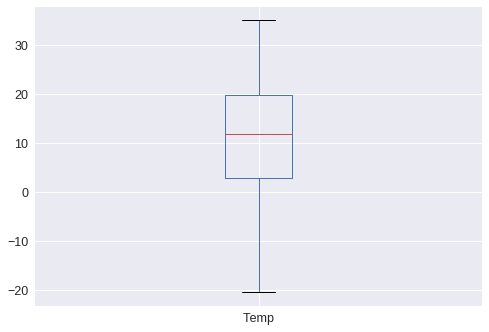

In [106]:

df.boxplot(column=[ 'Temp' ])


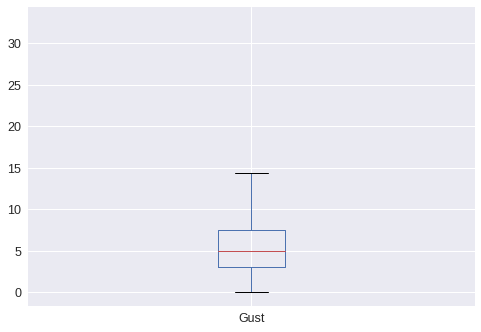

In [108]:
df.boxplot(column=[ 'Gust' ])

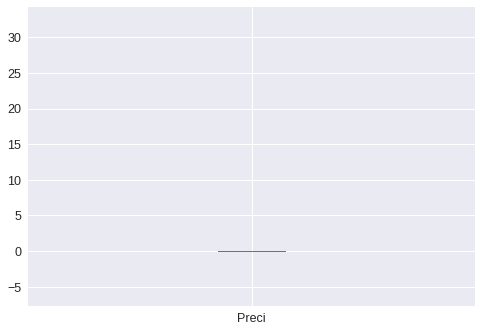

In [109]:
df.boxplot(column=[ 'Preci'])

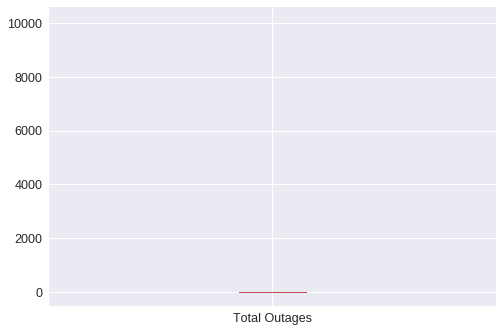

In [110]:
df.boxplot(column=['Total Outages'])

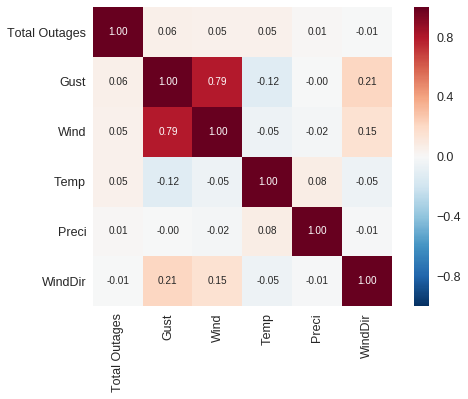

In [63]:
#Correlation plot
#correlation matrix
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

k = 6 #number of variables for heatmap
#correlation matrix
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Total Outages')['Total Outages'].index #Total Outages correlation matrix
 
cm = np.corrcoef(df[cols].values.T) #creates numpy array of correlation values
 
sns.set(font_scale=1.25) #sets font
#plot heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Question 1-Normalize input data

In [0]:
#combining response variable with normalized data
df2 = df[['Total Outages']] #subset of rest of the columns

#removing target variables
df1 = df.drop(['Total Outages'], axis=1)

from sklearn import preprocessing
#min max normalization
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns=df1.columns 

df = pd.concat([df2,df],axis =1) 


In [65]:
print(df.head())

   Total Outages      Temp     Preci      Gust      Wind   WindDir
0              0  0.414165  0.151507  0.212584  0.082163  0.774167
1              0  0.405357  0.151507  0.152108  0.053451  0.816111
2              0  0.407694  0.151507  0.173794  0.058033  0.786944
3              0  0.409851  0.151507  0.218387  0.053146  0.773889
4              0  0.413805  0.151507  0.226634  0.084606  0.814444


In [66]:
dataset = df.values
dataset = dataset.astype('float32')

float_data =dataset
float_data

array([[0.        , 0.41416514, 0.15150732, 0.2125841 , 0.08216254,
        0.7741667 ],
       [0.        , 0.40535656, 0.15150732, 0.15210758, 0.05345146,
        0.81611115],
       [0.        , 0.40769354, 0.15150732, 0.17379361, 0.05803302,
        0.7869445 ],
       ...,
       [0.        , 0.23943926, 0.15150732, 0.19883943, 0.09651806,
        0.8613889 ],
       [0.        , 0.23009144, 0.15150732, 0.21869284, 0.09376913,
        0.8502778 ],
       [0.        , 0.1761637 , 0.15150732, 0.09987787, 0.08307885,
        0.8361111 ]], dtype=float32)


Now here is the data generator that we will use. It yields a tuple `(samples, targets)` where `samples` is one batch of input data and 
`targets` is the corresponding array of target temperatures. It takes the following arguments:

* `data`: The original array of floating point data, which we just normalized in the code snippet above.
* `lookback`: How many timesteps back should our input data go.
* `delay`: How many timesteps in the future should our target be.
* `min_index` and `max_index`: Indices in the `data` array that delimit which timesteps to draw from. This is useful for keeping a segment 
of the data for validation and another one for testing.
* `shuffle`: Whether to shuffle our samples or draw them in chronological order.
* `batch_size`: The number of samples per batch.
* `step`: The period, in timesteps, at which we sample data. We will set it 6 in order to draw one data point every hour.

In [0]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        yield samples, targets

#Question 2: Evaluation metric
I am using Mean absolute error as the evaluation metric for predicting total outages as it is a continuous variable and am giving it as the loss measure for my model.
The equation is: np.mean(history_gru.history['loss'])

#Question 3


In [68]:
print(df.shape)
tr_end = round(df.shape[0]*0.8)
print(tr_end)
gap = (round((df.shape[0] - tr_end)*0.5))
val_beg = tr_end+1
val_end = val_beg + gap
test_beg= val_end+1
test_end =  round(df.shape[0] )
print(val_beg)
print(val_end)
print(test_beg)
print(test_end)


(16396, 6)
13117
13118
14758
14759
16396


In [0]:
lookback = 16
step = 1
delay = 1
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=tr_end,
                      shuffle=False,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=val_beg,
                    max_index=val_end,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=test_beg,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (val_end - val_beg - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - test_beg - lookback) // batch_size

In [70]:
lookback // step
float_data.shape[-1]

6

#Baseline model

In [71]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

from google.colab import drive, files

from tensorflow.keras.callbacks import ModelCheckpoint

filepath="/content/drive/My Drive/Colab Notebooks/myweights_base.hdf5"

checkpointer = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')

history_base = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=100,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                                 callbacks = [checkpointer] )
model.load_weights("/content/drive/My Drive/Colab Notebooks/myweights_base.hdf5")

Epoch 1/100
500/500 [==============================] - 5s 10ms/step - loss: 55.0504 - val_loss: 14.6229

Epoch 00001: loss improved from inf to 55.05039, saving model to /content/drive/My Drive/Colab Notebooks/myweights_base.hdf5
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 46.5130 - val_loss: 14.6678

Epoch 00002: loss improved from 55.05039 to 46.51302, saving model to /content/drive/My Drive/Colab Notebooks/myweights_base.hdf5
Epoch 3/100
500/500 [==============================] - 3s 5ms/step - loss: 45.4137 - val_loss: 15.4752

Epoch 00003: loss improved from 46.51302 to 45.41372, saving model to /content/drive/My Drive/Colab Notebooks/myweights_base.hdf5
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 44.3600 - val_loss: 14.1766

Epoch 00004: loss improved from 45.41372 to 44.35998, saving model to /content/drive/My Drive/Colab Notebooks/myweights_base.hdf5
Epoch 5/100
500/500 [==============================] - 3s 5ms/step -

In [72]:
base_train = np.mean(history_base.history['loss'])
base_test = model.evaluate_generator(test_gen,test_steps) 
base_val = np.mean(history_base.history['val_loss'])

error_metrics = pd.DataFrame([[base_train,base_test,base_val]],columns = ["Train" ,"Test","Validation"] )
error_metrics.rename(index={0:'base'}, inplace=True)
error_metrics

,Train,Test,Validation
base,42.240589,39.651912,14.291612


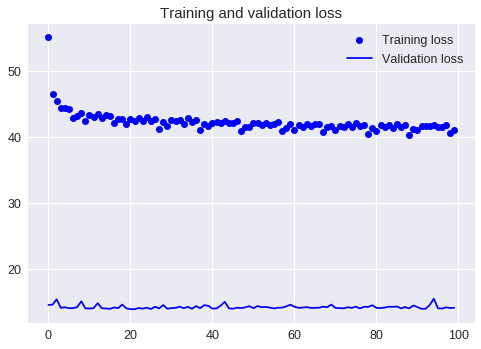

In [73]:
import matplotlib.pyplot as plt

loss = history_base.history['loss']
val_loss = history_base.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#GRU

In [74]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

filepath="/content/drive/My Drive/Colab Notebooks/myweights_gru.hdf5"

checkpointer = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')

history_gru = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=100,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks = [checkpointer])

model.load_weights("/content/drive/My Drive/Colab Notebooks/myweights_gru.hdf5")

Epoch 1/100
500/500 [==============================] - 10s 20ms/step - loss: 49.8391 - val_loss: 13.4052

Epoch 00001: loss improved from inf to 49.83911, saving model to /content/drive/My Drive/Colab Notebooks/myweights_gru.hdf5
Epoch 2/100
500/500 [==============================] - 7s 14ms/step - loss: 50.3913 - val_loss: 13.3914

Epoch 00002: loss did not improve from 49.83911
Epoch 3/100
500/500 [==============================] - 7s 14ms/step - loss: 48.2696 - val_loss: 13.3953

Epoch 00003: loss improved from 49.83911 to 48.26959, saving model to /content/drive/My Drive/Colab Notebooks/myweights_gru.hdf5
Epoch 4/100
500/500 [==============================] - 7s 14ms/step - loss: 50.2353 - val_loss: 13.3992

Epoch 00004: loss did not improve from 48.26959
Epoch 5/100
500/500 [==============================] - 7s 14ms/step - loss: 49.8874 - val_loss: 13.3974

Epoch 00005: loss did not improve from 48.26959
Epoch 6/100
500/500 [==============================] - 7s 14ms/step - loss: 5

In [75]:
gru_train = np.mean(history_gru.history['loss'])
gru_test =  model.evaluate_generator(test_gen,test_steps) 
gru_val = np.mean(history_gru.history['val_loss'])

error_metrics1 = pd.DataFrame([[gru_train,gru_test,gru_val]],columns = ["Train" ,"Test","Validation"] )
error_metrics1.rename(index={0:'GRU'}, inplace=True)
error_metrics = error_metrics.append(error_metrics1)
error_metrics

,Train,Test,Validation
base,42.240589,39.651912,14.291612
GRU,49.763021,50.932512,13.390008


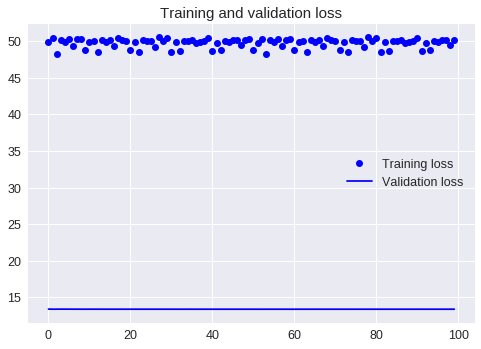

In [76]:
import matplotlib.pyplot as plt

loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Stacked RNN

In [86]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2,
                     recurrent_dropout=0.2,return_sequences=True, input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

filepath="/content/drive/My Drive/Colab Notebooks/myweights_srnn.hdf5"

checkpointer = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')

history_srnn = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks = [checkpointer])

model.load_weights("/content/drive/My Drive/Colab Notebooks/myweights_srnn.hdf5")

Epoch 1/40
500/500 [==============================] - 22s 45ms/step - loss: 48.7548 - val_loss: 13.3889

Epoch 00001: loss improved from inf to 48.75480, saving model to /content/drive/My Drive/Colab Notebooks/myweights_srnn.hdf5
Epoch 2/40
500/500 [==============================] - 18s 37ms/step - loss: 50.0476 - val_loss: 13.3923

Epoch 00002: loss did not improve from 48.75480
Epoch 3/40
500/500 [==============================] - 19s 37ms/step - loss: 49.9193 - val_loss: 13.4037

Epoch 00003: loss did not improve from 48.75480
Epoch 4/40
500/500 [==============================] - 18s 36ms/step - loss: 50.1010 - val_loss: 13.4157

Epoch 00004: loss did not improve from 48.75480
Epoch 5/40
500/500 [==============================] - 18s 36ms/step - loss: 49.9738 - val_loss: 13.4380

Epoch 00005: loss did not improve from 48.75480
Epoch 6/40
500/500 [==============================] - 18s 36ms/step - loss: 49.7703 - val_loss: 13.4153

Epoch 00006: loss did not improve from 48.75480
Epoch

In [89]:
srnn_train = np.mean(history_srnn.history['loss'])
srnn_test =  model.evaluate_generator(test_gen,test_steps) 
srnn_val = np.mean(history_srnn.history['val_loss'])

error_metrics1 = pd.DataFrame([[srnn_train,srnn_test,srnn_val]],columns = ["Train" ,"Test","Validation"] )
error_metrics1.rename(index={0:'Stacked RNN'}, inplace=True)
error_metrics = error_metrics.append(error_metrics1)
error_metrics

,Train,Test,Validation
base,42.240589,39.651912,14.291612
GRU,49.763021,50.932512,13.390008
Stacked RNN,584255.612744,50.005484,13.652888


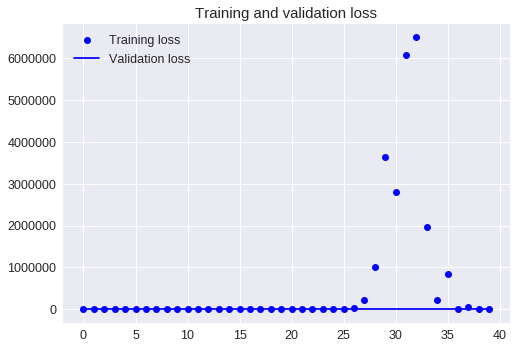

In [90]:
import matplotlib.pyplot as plt

loss = history_srnn.history['loss']
val_loss = history_srnn.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#LSTM

In [94]:

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(64, dropout=0.2, input_shape=(None, float_data.shape[-1])))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

filepath="/content/drive/My Drive/Colab Notebooks/myweights_lstm.hdf5"

checkpointer = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')

history_lstm = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=100,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks = [checkpointer])

model.load_weights("/content/drive/My Drive/Colab Notebooks/myweights_lstm.hdf5")

Epoch 1/100
500/500 [==============================] - 21s 42ms/step - loss: 48.5612 - val_loss: 13.3969

Epoch 00001: loss improved from inf to 48.56124, saving model to /content/drive/My Drive/Colab Notebooks/myweights_lstm.hdf5
Epoch 2/100
500/500 [==============================] - 15s 31ms/step - loss: 49.8222 - val_loss: 13.3944

Epoch 00002: loss did not improve from 48.56124
Epoch 3/100
500/500 [==============================] - 15s 31ms/step - loss: 48.6380 - val_loss: 13.3911

Epoch 00003: loss did not improve from 48.56124
Epoch 4/100
500/500 [==============================] - 15s 30ms/step - loss: 50.0710 - val_loss: 13.3920

Epoch 00004: loss did not improve from 48.56124
Epoch 5/100
500/500 [==============================] - 16s 31ms/step - loss: 50.1313 - val_loss: 13.3915

Epoch 00005: loss did not improve from 48.56124
Epoch 6/100
500/500 [==============================] - 15s 31ms/step - loss: 50.1151 - val_loss: 13.3904

Epoch 00006: loss did not improve from 48.56124

In [95]:
lstm_train = np.mean(history_lstm.history['loss'])
lstm_test =  model.evaluate_generator(test_gen,test_steps) 
lstm_val = np.mean(history_lstm.history['val_loss'])

error_metrics1 = pd.DataFrame([[lstm_train,lstm_test,lstm_val]],columns = ["Train" ,"Test","Validation"] )
error_metrics1.rename(index={0:'LSTM'}, inplace=True)
error_metrics = error_metrics.append(error_metrics1)
error_metrics

,Train,Test,Validation
base,42.240589,39.651912,14.291612
GRU,49.763021,50.932512,13.390008
Stacked RNN,584255.612744,50.005484,13.652888
LSTM,49.673516,50.484021,13.403867


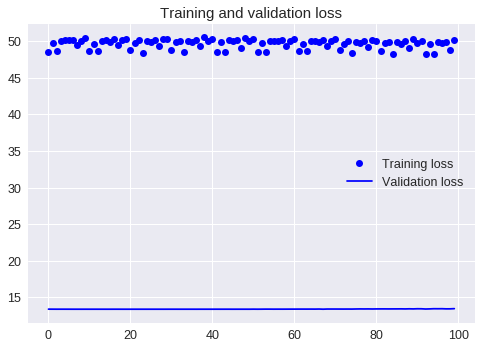

In [96]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#CNN

In [97]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(128, 1, activation='relu',
input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(64, 1, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 1, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(16, 1, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
model.summary()


filepath="/content/drive/My Drive/Colab Notebooks/myweights_cnn.hdf5"

checkpointer = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')

history_cnn = model.fit_generator(train_gen,
            steps_per_epoch=500,
            epochs=20,
            validation_data=val_gen,
            validation_steps=val_steps,
            callbacks = [checkpointer])

model.load_weights("/content/drive/My Drive/Colab Notebooks/myweights_cnn.hdf5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, None, 128)         896       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, None, 64)          8256      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, None, 16)          528       
__________

In [98]:
cnn_train = np.mean(history_cnn.history['loss'])
cnn_test =  model.evaluate_generator(test_gen,test_steps) 
cnn_val = np.mean(history_cnn.history['val_loss'])

error_metrics1 = pd.DataFrame([[cnn_train,cnn_test,cnn_val]],columns = ["Train" ,"Test","Validation"] )
error_metrics1.rename(index={0:'CNN'}, inplace=True)
error_metrics = error_metrics.append(error_metrics1)
error_metrics

,Train,Test,Validation
base,42.240589,39.651912,14.291612
GRU,49.763021,50.932512,13.390008
Stacked RNN,584255.612744,50.005484,13.652888
LSTM,49.673516,50.484021,13.403867
CNN,49.777176,50.931925,13.388093


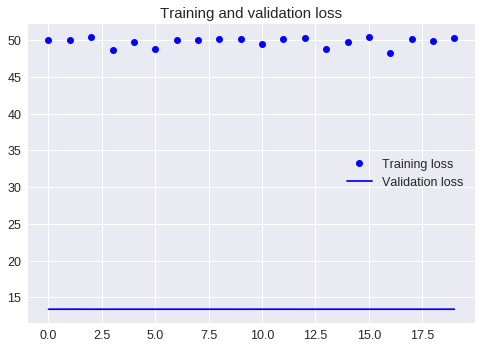

In [99]:
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#FINAL error metrics

In [111]:
error_metrics

,Train,Test,Validation
base,42.240589,39.651912,14.291612
GRU,49.763021,50.932512,13.390008
Stacked RNN,584255.612744,50.005484,13.652888
LSTM,49.673516,50.484021,13.403867
CNN,49.777176,50.931925,13.388093
